# Imports 

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
# for the box-cox transform
from scipy.stats import boxcox


# Topics

## LOG TRANSFORM VS BOX-COX TRANSFORM with skewed data 

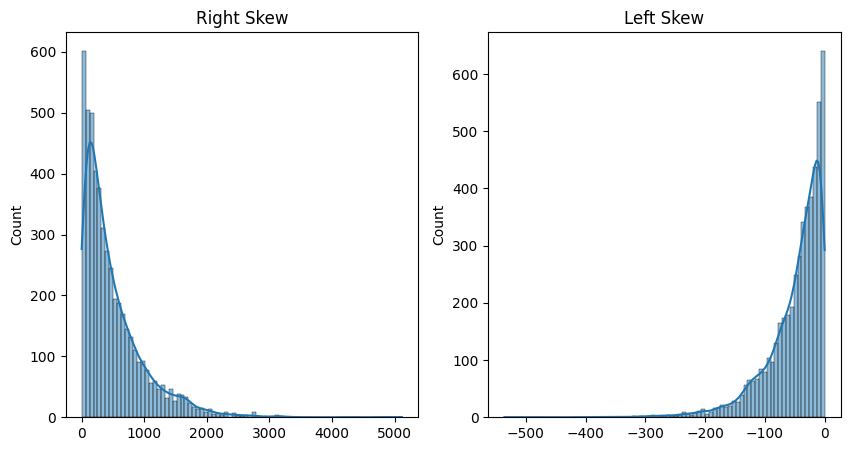

In [57]:
# mock left skew and right skew data
np.random.seed(0)
right_skew = np.random.exponential(scale=500, size=5000)
left_skew = np.random.exponential(scale=50, size=5000)
left_skew = -left_skew

# plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(right_skew, kde=True, ax=ax[0])
sns.histplot(left_skew, kde=True, ax=ax[1])
ax[0].set_title('Right Skew')
ax[1].set_title('Left Skew')
plt.show()


### Log Transform

#### Left skewed data


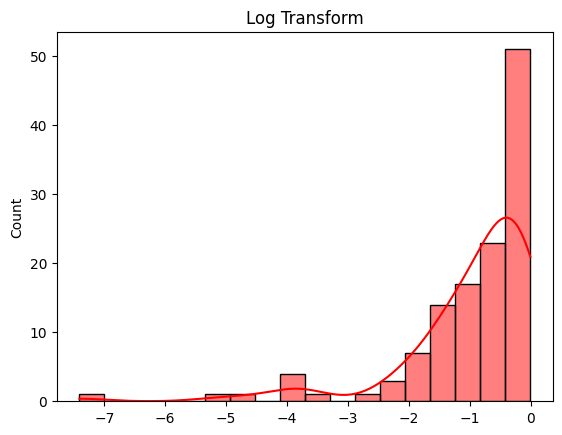

In [58]:
# apply log transform
import warnings
warnings.filterwarnings('ignore')

log_left_skew = np.log1p(left_skew)

sns.histplot(log_left_skew, kde=True, color='red')
plt.title('Log Transform')
plt.show()




#### Right skewed data

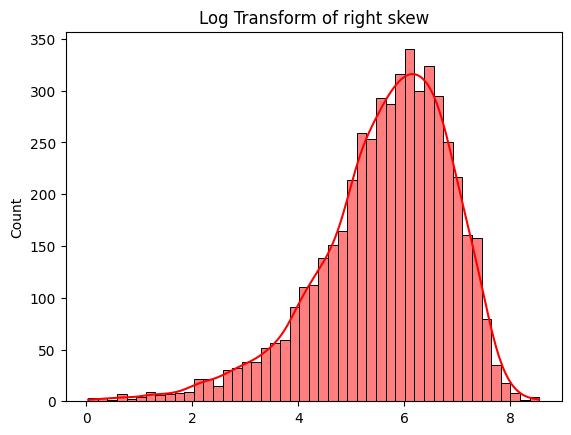

In [59]:
log_right_skew = np.log1p(right_skew)

sns.histplot(log_right_skew, kde=True, color='red')
plt.title('Log Transform of right skew')
plt.show()


#### right skewed data with high values

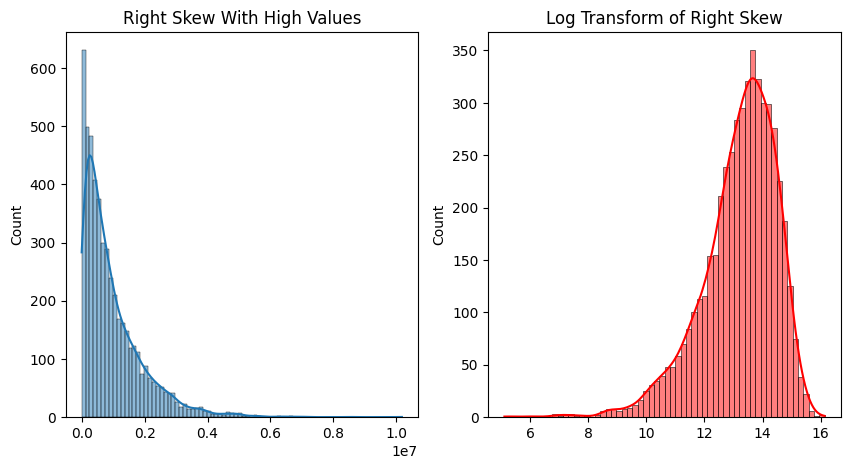

In [60]:
# using right skew data with high_values 
right_skew = np.random.exponential(scale=1000000, size=5000)

# plot the data before and after the log 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(right_skew, kde=True, ax=ax[0])
sns.histplot(np.log1p(right_skew), kde=True, ax=ax[1],  color='red')
ax[0].set_title('Right Skew With High Values')
ax[1].set_title('Log Transform of Right Skew')
plt.show()


_comment : log transform is not suitable for right skewed data with high values , also not switable for left skewed data_

**reason** : this is because the log function has a high slope at the beginning , so it will stretch the data points at the beginning and compress the data points at the end. 

right skew works with small values (less than 1000 ) because the stretch effect works well with small values , but when the values are high the stretch effect will be too much and the data will be compressed too much.

### log1p vs log in numpy

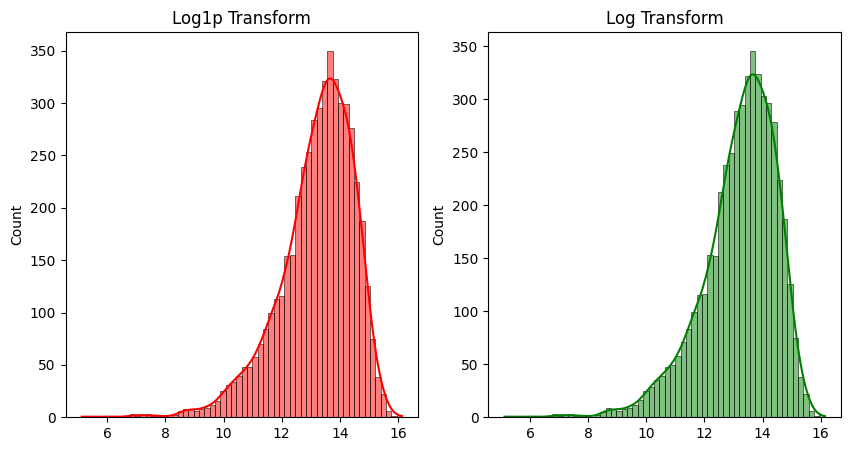

In [61]:
log1p_right_skew = np.log1p(right_skew)
log_right_skew = np.log(right_skew)

fig , ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(log1p_right_skew, kde=True, ax=ax[0], color='red')
sns.histplot(log_right_skew, kde=True, ax=ax[1], color='green')
ax[0].set_title('Log1p Transform')
ax[1].set_title('Log Transform')
plt.show()

# they behave almost the same

### Box-Cox Transform

#### Left skewed data

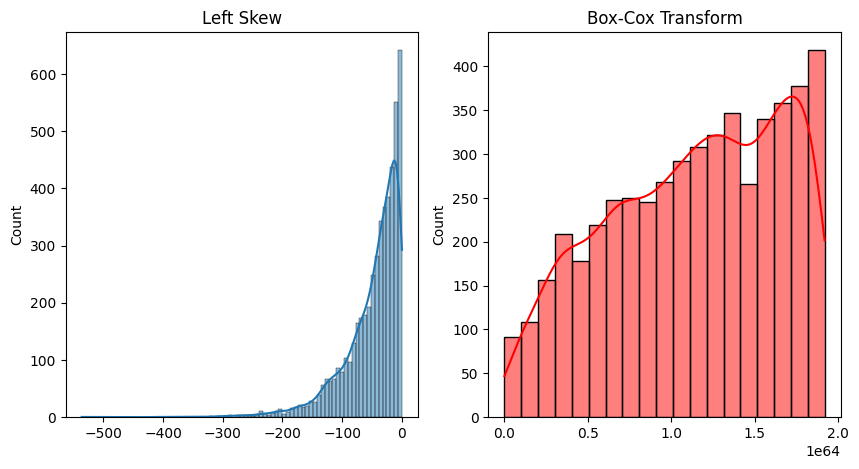

In [75]:
left_skew_bxcx = boxcox(left_skew+1500)[0]

# plot 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(left_skew, kde=True, ax=ax[0])
sns.histplot(left_skew_bxcx, kde=True, ax=ax[1], color='red')
ax[0].set_title('Left Skew')
ax[1].set_title('Box-Cox Transform')
plt.show()


#### Right skewed data

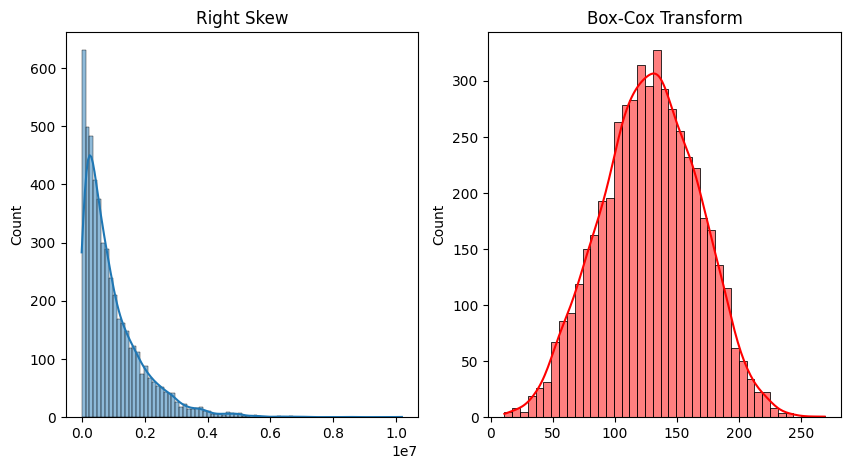

In [72]:
right_skew_bxcx = boxcox(right_skew)[0]

# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(right_skew, kde=True, ax=ax[0])
sns.histplot(right_skew_bxcx, kde=True, ax=ax[1], color='red')
ax[0].set_title('Right Skew')
ax[1].set_title('Box-Cox Transform')
plt.show()


_comment : Box cox transform is suitable for right skewed data with high values_

**reason** : this is because log transform is special case from box-cox transform when lambda = 0 , so box-cox transform will have the same effect as log transform when lambda = 0 , but it will have more flexibility to handle different values of lambda , so it can handle the high values of right skewed data.

also this is because box-cox transform is a power transform , so it will have a power to stretch the data points at the beginning and compress the data points at the end , but the power is not fixed as in log transform , it can be adjusted by lambda value.